**1.Загрузка и первичный обзор**


загрузить данные через pandas;

вывести первые/последние строки;

посмотреть структуру данных;

проверить типы данных и при необходимости привести их к корректным типам.



In [5]:
import pandas as pd

df = pd.read_csv('/content/animes.csv')

print("первые 5 строк:")
print(df.head())

print("\n" + "-"*30 + "\n")

print("Последние 5 строк:")
print(df.tail())

print("\n" + "-"*30 + "\n")

print("Info:")
df.info()

первые 5 строк:
   animeID                                              title  \
0        1                               Howl's Moving Castle   
1        2                                         Death Note   
2        3  Problem Children Are Coming from Another World...   
3        4                                            BTOOOM!   
4        5                                   Sword Art Online   

                                 alternative_title   type  year score  \
0                              Howl no Ugoku Shiro  MOVIE  2004  8.41   
1                                              NaN     TV  2006  8.63   
2  Mondaiji-tachi ga Isekai kara Kuru Sou desu yo?     TV  2013  7.42   
3                                          Btooom!     TV  2012  7.34   
4                                              NaN     TV  2012   7.5   

   episodes                              mal_url  sequel  \
0         1    https://myanimelist.net/anime/431   False   
1        37   https://myanimelist.

##Пропущенные значения

найти пропуски (isnull, isna);

посчитать количество пропусков по столбцам;

выбрать стратегию заполнения или удаления:

удаление строк/столбцов;

заполнение медианой/средним/модой/значениями по группам.

##Способ 1
median_score, inplace=True

In [6]:
import numpy as np

missing_values_count = df.replace('?', np.nan).isnull().sum()
print(missing_values_count)

print("\n" + "-"*30 + "\n")

df['score'] = df['score'].replace('?', np.nan)
df['year'] = df['year'].replace('?', np.nan)

df['score'] = pd.to_numeric(df['score'], errors='coerce')

df['year'] = pd.to_numeric(df['year'], errors='coerce')

median_score = df['score'].median()
df['score'].fillna(median_score, inplace=True)

mode_year = df['year'].mode()[0]
df['year'].fillna(mode_year, inplace=True)

df['alternative_title'].fillna('Unknown', inplace=True)

print("Пропущенные значения:")
print(df.isnull().sum())

print("\n" + "-"*30 + "\n")

print("Info(после удаления пропусков):")
df.info()


animeID                  0
title                    0
alternative_title    11561
type                     0
year                   136
score                  593
episodes                 0
mal_url                  0
sequel                   0
image_url                0
genres                   0
genres_detailed          0
dtype: int64

------------------------------

Пропущенные значения:
animeID              0
title                0
alternative_title    0
type                 0
year                 0
score                0
episodes             0
mal_url              0
sequel               0
image_url            0
genres               0
genres_detailed      0
dtype: int64

------------------------------

Info(после удаления пропусков):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20237 entries, 0 to 20236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   animeID            20237 non-null  int64  
 

/tmp/ipython-input-465593722.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['score'].fillna(median_score, inplace=True)
/tmp/ipython-input-465593722.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

##Способ 2
fillna(median_score)

In [7]:
import numpy as np

missing_values_count = df.replace('?', np.nan).isnull().sum()
print(missing_values_count)

print("\n" + "-"*30 + "\n")

df['score'] = df['score'].replace('?', np.nan)
df['year'] = df['year'].replace('?', np.nan)

df['score'] = pd.to_numeric(df['score'], errors='coerce')

df['year'] = pd.to_numeric(df['year'], errors='coerce')

median_score = df['score'].median()
df['score'] = df['score'].fillna(median_score)

mode_year = df['year'].mode()[0]
df['year'] = df['year'].fillna(mode_year)

df['alternative_title'] = df['alternative_title'].fillna('Unknown')

print("Пропущенные значения:")
print(df.isnull().sum())

print("\n" + "-"*30 + "\n")

print("Info(после удаления пропусков):")
df.info()

animeID              0
title                0
alternative_title    0
type                 0
year                 0
score                0
episodes             0
mal_url              0
sequel               0
image_url            0
genres               0
genres_detailed      0
dtype: int64

------------------------------

Пропущенные значения:
animeID              0
title                0
alternative_title    0
type                 0
year                 0
score                0
episodes             0
mal_url              0
sequel               0
image_url            0
genres               0
genres_detailed      0
dtype: int64

------------------------------

Info(после удаления пропусков):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20237 entries, 0 to 20236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   animeID            20237 non-null  int64  
 1   title              20237 non-null  object 
 

##Дубликаты

найти дубликаты (duplicated);

вывести количество дублирующихся строк;

удалить их при необходимости (drop_duplicates)


In [8]:
print("Количество повтор. строк до удаления:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("\n" + "-"*30 + "\n")

print("Количество повтор. строк после удаления:")
print(df.duplicated().sum())

print("\n" + "-"*30 + "\n")

print("После удаления дубликатов:")
print(df.shape)

Количество повтор. строк до удаления:
0

------------------------------

Количество повтор. строк после удаления:
0

------------------------------

После удаления дубликатов:
(20237, 12)


##Выбросы (при необходимости)

с помощью z-score из numpy;

визуально (boxplot).


Количество выявленных выбросов > 3.0: 483

------------------------------



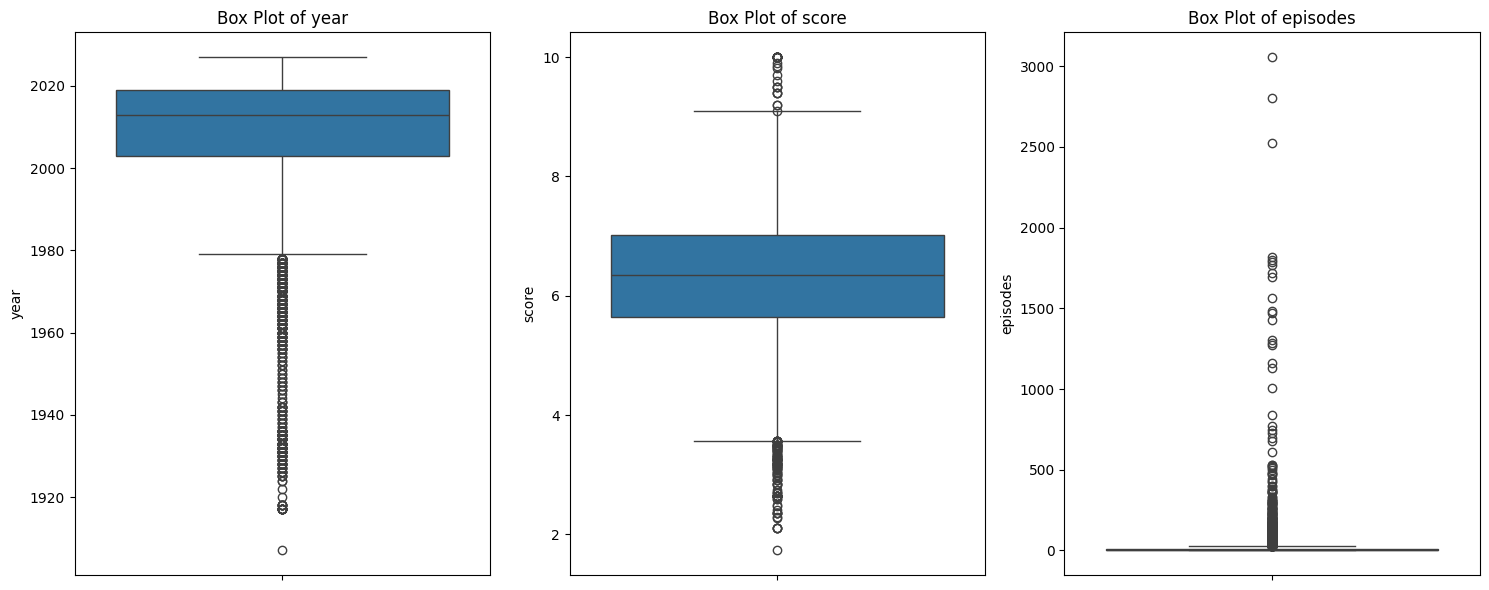

In [9]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['year', 'score', 'episodes']

df_zscore = df[numerical_cols].apply(lambda x: np.abs(stats.zscore(x)))

outlier_threshold = 3.0

outliers = df[(df_zscore > outlier_threshold).any(axis=1)]

print(f"Количество выявленных выбросов > {outlier_threshold}: {len(outliers)}")

print("\n" + "-"*30 + "\n")

plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


##Статистики данных:
описательная статистика (describe);

подсчёт уникальных значений, частоты;

корреляционный анализ (corr).


Статистика:
             animeID             title alternative_title   type          year  \
count   20237.000000             20237             20237  20237  20237.000000   
unique           NaN             20047              8676      5           NaN   
top              NaN  Spirit Guardians           Unknown     TV           NaN   
freq             NaN                 5             11561   5766           NaN   
mean    10119.000000               NaN               NaN    NaN   2008.878935   
std      5842.063035               NaN               NaN    NaN     14.706719   
min         1.000000               NaN               NaN    NaN   1907.000000   
25%      5060.000000               NaN               NaN    NaN   2003.000000   
50%     10119.000000               NaN               NaN    NaN   2013.000000   
75%     15178.000000               NaN               NaN    NaN   2019.000000   
max     20237.000000               NaN               NaN    NaN   2027.000000   

              

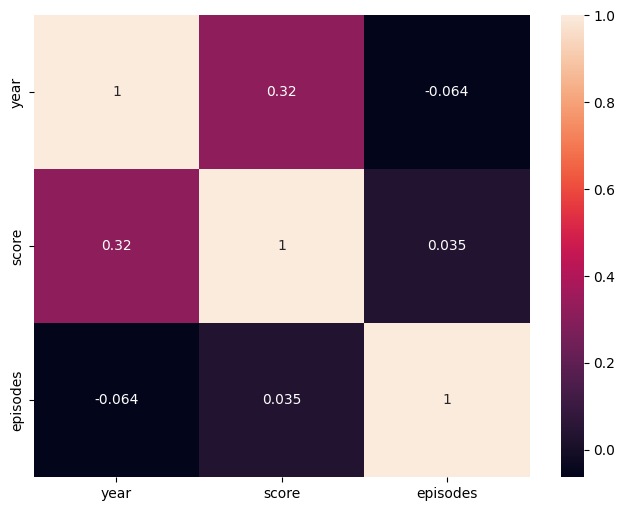

In [10]:
print("\nСтатистика:")
print(df.describe(include='all'))

print("\n" + "-"*30 + "\n")

print("Уникальные значения:")
print(df['type'].value_counts())

print("\n" + "-"*30 + "\n")

#Вычисление корреляционной матрицы для числовых столбцов
numerical_cols = ['year', 'score', 'episodes']
correlation_matrix = df[numerical_cols].corr()
print("Корреляционная матрица:")
print(correlation_matrix)

print("\n" + "-"*30 + "\n")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

##Визуализация данных
Нужно построить минимум 5 графиков:

гистограммы распределений;

линейный график;

столбчатые диаграммы;

boxplot;

heatmap корреляций.

Можно использовать: matplotlib, seaborn, plotly.

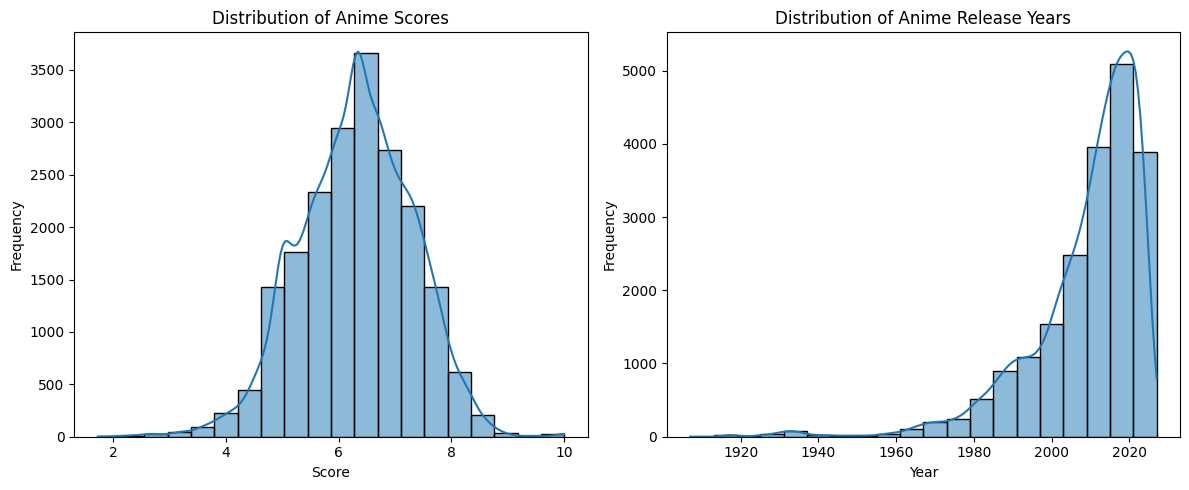

/tmp/ipython-input-998311106.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')


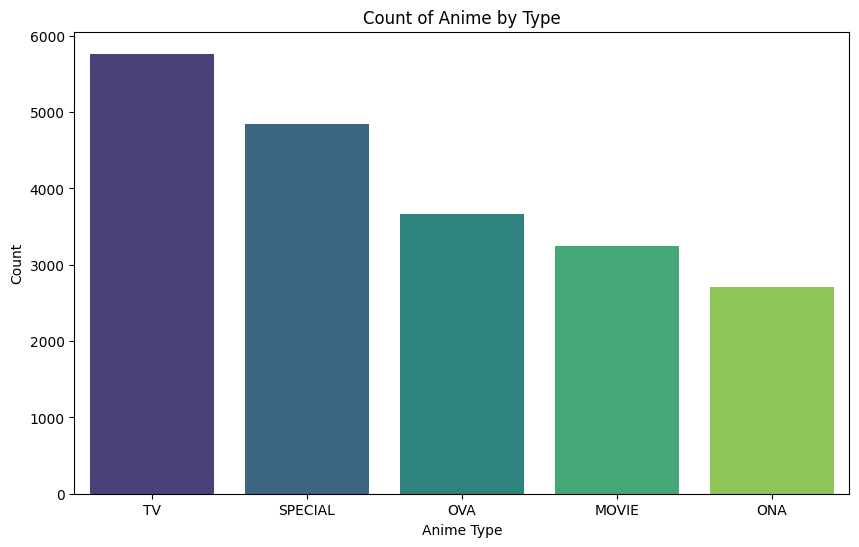

/tmp/ipython-input-998311106.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_score_by_type.index, y=avg_score_by_type.values, palette='plasma')


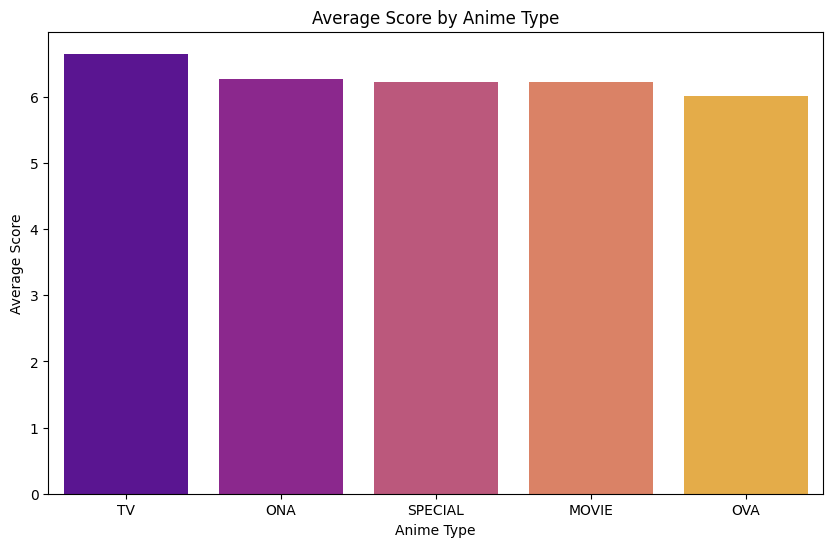

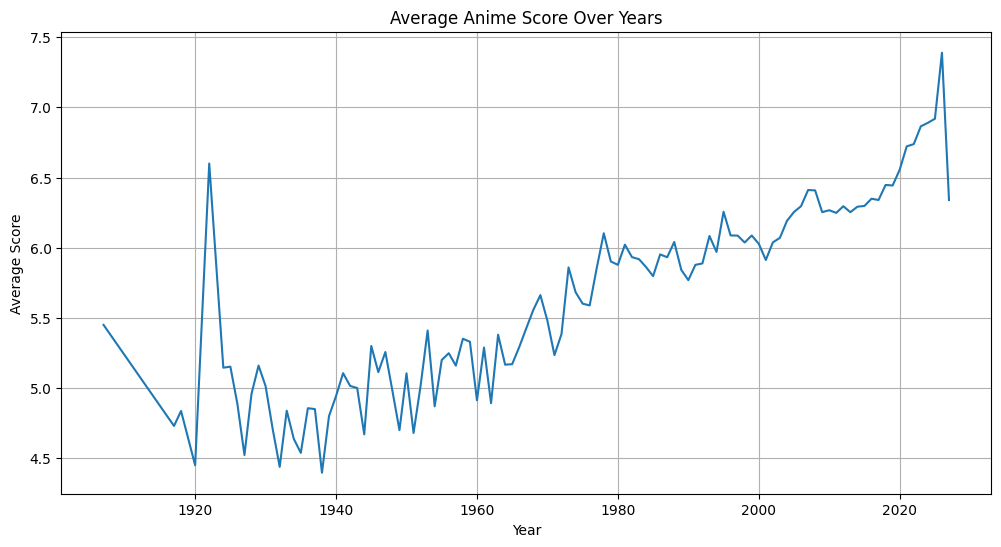

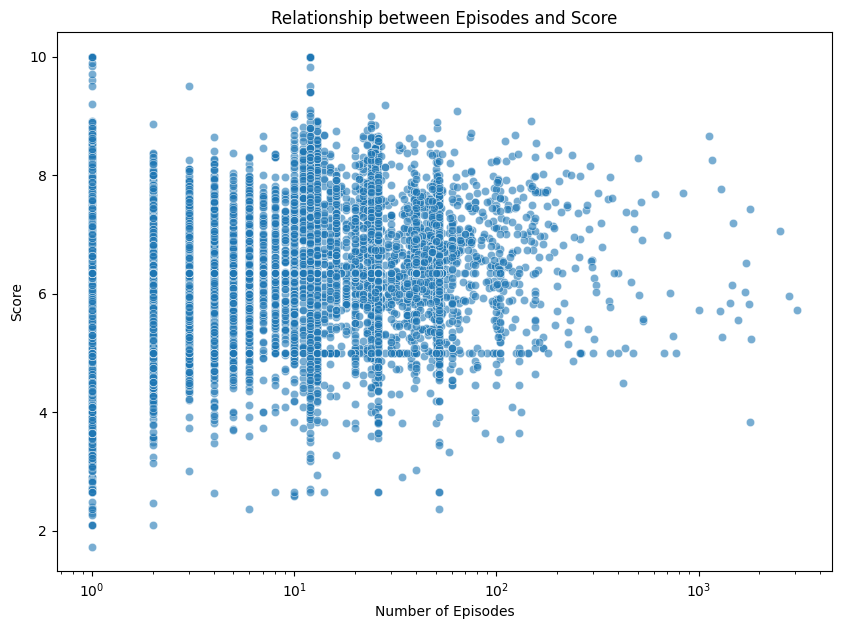

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.'score' and 'year'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['year'], bins=20, kde=True)
plt.title('Distribution of Anime Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2.Гистограмма для подсчета каждого типа аниме
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')
plt.title('Count of Anime by Type')
plt.xlabel('Anime Type')
plt.ylabel('Count')
plt.show()

# 3.Гистограмма средней оценки каждого типа аниме
avg_score_by_type = df.groupby('type')['score'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_score_by_type.index, y=avg_score_by_type.values, palette='plasma')
plt.title('Average Score by Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Average Score')
plt.show()

# 4.'score' over 'year'
avg_score_by_year = df.groupby('year')['score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_score_by_year, x='year', y='score')
plt.title('score over year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

# 5.'episodes' and 'score'
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='episodes', y='score', alpha=0.6)
plt.title(''episodes' and 'score'')
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.xscale('log')
plt.show()


In [18]:
print("\nсреднее по группам:")
avg_stats_by_type = df.groupby('type')[['score', 'episodes']].mean()
print(avg_stats_by_type)

print("\nмедиана по группам:")
median_stats_by_type = df.groupby('type')[['score', 'episodes']].median()
print(median_stats_by_type)

print("\nподсчёт количества:")
anime_count_by_type = df.groupby('type').size().rename('count')
print(anime_count_by_type)

print("\n" + "-"*30 + "\n")

print("суммирование:")

total_episodes_by_year = df.groupby('year')['episodes'].sum()
print(total_episodes_by_year.head())

print("\n" + "-"*30 + "\n")

print("построение сводной таблицы")
pivot_table_score = pd.pivot_table(df, values='score', index='year', columns='type', aggfunc='mean')
print(pivot_table_score.head())

print("\n" + "-"*30 + "\n")

avg_score_type_sequel = df.groupby(['type', 'sequel'])['score'].mean().unstack()
print(avg_score_type_sequel)



среднее по группам:
            score   episodes
type                        
MOVIE    6.220068   1.095077
ONA      6.273793  14.417987
OVA      6.013401   2.440863
SPECIAL  6.232546   1.893955
TV       6.653283  34.195109

медиана по группам:
         score  episodes
type                    
MOVIE    6.285       1.0
ONA      6.330       8.0
OVA      6.030       2.0
SPECIAL  6.300       1.0
TV       6.700      13.0

подсчёт количества:
type
MOVIE      3250
ONA        2713
OVA        3661
SPECIAL    4847
TV         5766
Name: count, dtype: int64

------------------------------

суммирование:
year
1907.0     1
1917.0    12
1918.0     6
1920.0     1
1922.0     1
Name: episodes, dtype: int64

------------------------------

построение сводной таблицы
type       MOVIE  ONA  OVA  SPECIAL  TV
year                                   
1907.0  5.450000  NaN  NaN      NaN NaN
1917.0  4.730000  NaN  NaN      NaN NaN
1918.0  4.836667  NaN  NaN      NaN NaN
1920.0  4.450000  NaN  NaN      NaN NaN
19